In [18]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import statistics

import sklearn.linear_model
import sklearn.metrics
import sklearn.preprocessing
import math


$Y \approx \beta_0 + \beta_1 X$
* X is an input vector 
* $\beta_0$ and $\beta_1$ are two unknown constants that represent the intercept and slope terms in the lienar model. 
* Together $\beta_0$ and $\beta_1$ are known as the model *coefficients* or *parameters*. 

We use training data to produce estimates $\hat{\beta_0}$ and $\hat{\beta_1}$ for the model coefficients: 

$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x$$

* $\hat{y}$ indicates the prediction of $Y$ on the basis of $X = x$


Let $\hat{y_i} = \hat{\beta_0} + \hat{\beta_1}x_i$ be the prediction for $Y$ based on the $i$ th value of $X$. 

$e_i = y_i - \hat y_i$ represents the $i$ th residual or the difference between the $i$ th observed response value and the $i$ th response value that is predicted by our linear model. 



### Residual Sum of Squares (RSS): 

$$RSS = e^2_1 + e^2_2 + \ldots + e^2_n$$

or 


$$RSS = (y_1 - \hat \beta_0 - \hat \beta_1 x_1)^2 + (y_2 - \hat \beta_0 - \hat \beta_1 x_2)^2 + \ldots + (y_n - \hat \beta_0 - \hat \beta_1 x_n)^2$$

Least Squares approach chooses $\hat \beta_0$ and $\hat \beta_1$ to minimize the RSS. 

The minimizers are: 

$$\hat \beta_1 = \frac{\sum_{i = 1}^n (x_i - \bar x)(y_i - \bar y)}{\sum_{i = 1}^n (x_i - \bar x)^2}$$

$$\hat \beta_0 = \bar y - \hat \beta_1 \bar x$$

Where: 
- $\bar y \equiv \frac{1}{n} \sum_{i = 1}^{n} y_i$ 
- $\bar x \equiv \frac{1}{n} \sum_{i = 1}^{n} x_i$ 


### Assessing the Accuracy of the Coefficient Estimates

$$\text{SE}(\hat\beta_1)^2 = \frac{\sigma^2}{\sum^{n}_{i = 1}(x_i - \bar x)^2}$$


$$\text{SE}(\hat\beta_0)^2 = \sigma^2 \left[\frac{1}{n} + \frac{\bar x^2}{\sum^{n}_{i = 1} (x_i - \bar x)^2}\right]$$

In [19]:
Data = pd.read_csv('../ExampleData/Housing.csv')

Data


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


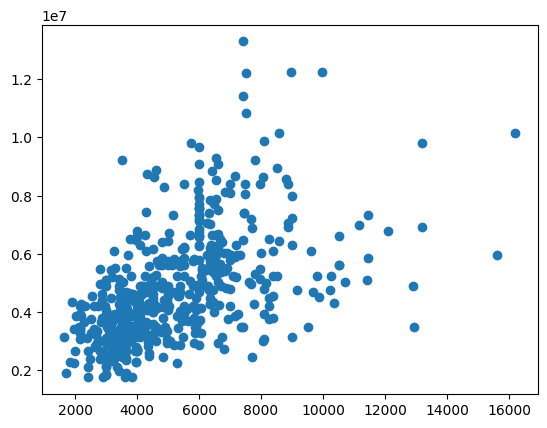

In [20]:
x_values = Data['area']
y_values = Data['price']


plt.scatter(x_values, y_values)

plt.show()

### Minimizers


$$\hat \beta_1 = \frac{\sum_{i = 1}^n (x_i - \bar x)(y_i - \bar y)}{\sum_{i = 1}^n (x_i - \bar x)^2}$$

$$\hat \beta_0 = \bar y - \hat \beta_1 \bar x$$

In [21]:

x_bar = statistics.mean(x_values)
y_bar = statistics.mean(y_values)
n = len(x_values)


### Beta_1


numerator = 0
denominator = 0

for i in range(0, n):
    numerator += (x_values[i] - x_bar) * (y_values[i] - y_bar) 

for i in range(0, n):
    denominator += (x_values[i] - x_bar)**2

beta_1_hat = numerator/denominator

print(f"Beta_1_hat: {beta_1_hat}")

### Beta_0

beta_0_hat = y_bar - beta_1_hat * x_bar

print(f"Beta_0_hat: {beta_0_hat}")



Beta_1_hat: 461.9748942727828
Beta_0_hat: 2387308.482396433


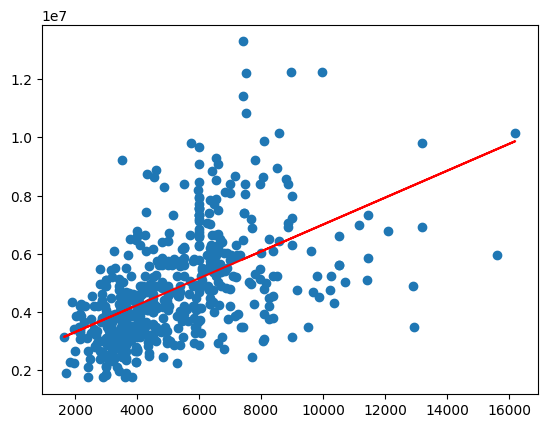

RMSE: 1577612.5627607866
Mean Squared Error: 2488861398180.6567
Standard Error of the Intercept (beta_0): 7460.936842501069
Standard Error of the Slope (beta_1): 1.3351027744495845


In [22]:
### Example using sklearn 

model = sklearn.linear_model.LinearRegression()

x_values_np = np.array(x_values)

model.fit(x_values_np.reshape(-1, 1), y_values)

predictions = model.predict(x_values_np.reshape(-1, 1))

plt.scatter(x_values, y_values)
plt.plot(x_values_np, predictions, color="red", label="(Example) Linear Regression Line")
plt.show()

### Calculate mean squared error

mse = sklearn.metrics.mean_squared_error(y_values, predictions)

# print(f"MSE: {mse}")


### Calculate standard error

standard_error = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {standard_error}")

X_val = x_values_np.reshape(-1, 1)


k = X_val.shape[1]


X_with_intercept = np.c_[np.ones(X_val.shape[0]), X_val]


XTX_inverse = np.linalg.inv(X_with_intercept.T @ X_with_intercept)

n_e = X_val.shape[0]
se_intercept = np.sqrt(mse * XTX_inverse[0, 0] / n_e)
se_slope = np.sqrt(mse * XTX_inverse[1, 1] / n_e)

print(f'Mean Squared Error: {mse}')
print(f'Standard Error of the Intercept (beta_0): {se_intercept}')
print(f'Standard Error of the Slope (beta_1): {se_slope}')

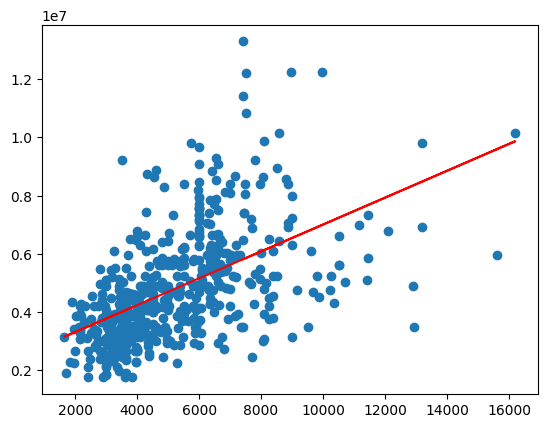

In [23]:
### Make predictions 

Y_hat = []

for i in range(0, n): 
    y_hat = beta_0_hat + beta_1_hat * x_values[i]
    Y_hat.append(y_hat)




plt.scatter(x_values, y_values)
plt.plot(x_values, Y_hat, color="red", label="Linear Regression Line")

plt.show()







### Assessing the Accuracy of the Coefficient Estimates

$$\text{SE}(\hat\beta_1)^2 = \frac{\sigma^2}{\sum^{n}_{i = 1}(x_i - \bar x)^2}$$


$$\text{SE}(\hat\beta_0)^2 = \sigma^2 \left[\frac{1}{n} + \frac{\bar x^2}{\sum^{n}_{i = 1} (x_i - \bar x)^2}\right]$$


### Mean Squared Error (MSE) 

$$MSE = \frac{\sum_{i = 1}^n (y_i - \hat{y_i})^2}{n}$$

$\text{Error} = y_i - \hat{y}_i$ 

or 

Error = Actual Value - Predicted Value




MSE is the average squared distance between the observed and predicted values. Only a perfect model with no error produces a MSE of 0. 

### Standard Error (SE) 

SE is a measure of the standard deviation of the errors in a regression model. The standard error of the estimate is a measure of the average deviation of hte errors. This tells us on average how much the dependent varaible differs from the regression model based on the independent variables. 

$$ SE = \sqrt{\frac{\sum_{i = 1}^{n} (y_i - \hat{y}_i)^2}{n - 2}}$$


$(n - 2)$ in the denominator represents the degrees of freedom adjustment for estimating the population parameters for the sample. The subtraction of 2 accounts for the fact that two parameters (the slope and the intercept) are estimated from the sample data. 




In [24]:
# Variance 

numerator = 0

for i in range(0, n): 
    numerator += (x_values[i] - x_bar)**2

variance = numerator/n


# Standard Error Beta_1_hat 

denominator = 0
for i in range(0, n): 
    denominator += (x_values[i] - x_bar)**2

SE_beta_1_hat = variance / denominator

# print(f"Standard Error Beta_1_hat: {SE_beta_1_hat}")



# Standard Error Beta_0_hat
    

SE_beta_0_hat = variance * ((1/n) + ((x_bar**2) / denominator))

# print(f"Standard Error Beta_0_hat: {SE_beta_0_hat}")



### Mean Squared Error (MSE)

numerator = 0
for i in range(0, n): 
    numerator += (y_values[i] - Y_hat[i])**2


MSE = numerator / n

    
print(f"Mean Squared Error: {MSE}") # Essentially Matches Sklearn 

print(f"Root Mean Squared Errror (RMSE): {math.sqrt(MSE)}") 

squared_errors = [(y_values[i] - Y_hat[i]) ** 2 for i in range(0, n)]
sum_squared_errors = sum(squared_errors)
SE = math.sqrt(sum_squared_errors / (n - 2))


print(f"Standard Error: {SE}") # Almost matches sklearn (the formula is correct)






Mean Squared Error: 2488861398180.658
Root Mean Squared Errror (RMSE): 1577612.562760787
Standard Error: 1580515.2562230139
